<a href="https://colab.research.google.com/github/githubshathik/Machine_learning_Tasks_5-6/blob/shathik/Task5_pract_adoptusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Advance programming and Master data science-GUVI

Task 5 :Adopt users define Submission

Name:Mohamed Shathik

Batch:D10(B)

Dept:Data Science

mail id:mohamedshafa17@gmail.com

**Objective:**

Our goal is to define an "adopted user" as one who has logged into the product on 3 separate days in at least 1 seven-day period
identify which factors predict future user adoption
brief writeup of analysis and any ideas for further research

In [1]:
# Import necessary packages 
%autosave 60
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remove deprecation warnings
import warnings
warnings.filterwarnings('ignore')

Autosaving every 60 seconds


In [2]:
# Load the first dataset "users" with latin encoding since there were errors without encoding
users = pd.read_csv('/content/takehome_users.csv',encoding='latin')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
users.describe(include='all')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,12000,12000,12000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
unique,NaN,11996,11355,11980,5,NaN,NaN,NaN,NaN,NaN
top,NaN,2014-02-11 17:57:53,Araujo Gabriela,UlrikeGerste@gmail.com,ORG_INVITE,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,5,2,4254,NaN,NaN,NaN,NaN,NaN
mean,6000.50000,NaN,NaN,NaN,NaN,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,NaN,NaN,NaN,NaN,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,NaN,NaN,NaN,NaN,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,NaN,NaN,NaN,NaN,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,NaN,NaN,NaN,NaN,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,NaN,NaN,NaN,NaN,1.398443e+09,0.000000,0.000000,238.250000,8817.000000


In [73]:
!pip3 install pandas_profiling --upgrade

In [6]:
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [74]:
from pandas_profiling import ProfileReport
profile = ProfileReport(users)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We see above that the last_session_creation_time column is not a datetime object and that there are much fewer data in this column. There are also significant missing values in the invited_by_user_id column. 

Data of 12,000 users who signed up for Relax the product in last 2 years
* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one of 5 values:
    * PERSONAL_PROJECTS: invited to join another user's personal workspace
    * GUEST_INVITE: invited to an organization as a guest (limited permissions)
    * ORG_INVITE: invited to an organization (as a full member)
    * SIGNUP: signed up via the website
    * SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving marketing emails
* enabled_for_marketing_drip: whether they are on the regular marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).

In [8]:
# Load user engagement data
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
engagement.describe(include='all')

,time_stamp,user_id,visited
count,207917,207917.000000,207917.0
unique,207220,NaN,NaN
top,2014-02-20 21:21:37,NaN,NaN
freq,2,NaN,NaN
mean,NaN,5913.314197,1.0
std,NaN,3394.941674,0.0
min,NaN,1.000000,1.0
25%,NaN,3087.000000,1.0
50%,NaN,5682.000000,1.0
75%,NaN,8944.000000,1.0


In [10]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
engagement.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

The engagement data has no missing values and contain visited data for each user with a time_stamp on each row of the 207,917 entries.

**Defining adopted users**:

After our brief EDA analysis we will use our engagement data to engineer a new feature called "adopted users" based on if they have logged into the product on three separate days in at least one seven-day period.

In [12]:
# How many values does 'visited' take?
sorted(list(engagement['visited'].unique()))

[1]

In [13]:
# Count how many unique users in our engagment data of the 207,917 entries 
print('There are {} unique users of the 207,917 entries in engagement data'\
      .format(len(engagement['user_id'].unique())))

There are 8823 unique users of the 207,917 entries in engagement data


In [14]:
# Convert timestamp
engagement.time_stamp= pd.to_datetime(engagement.time_stamp)
engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


Since the object_id is same with the user_id, change the name and it will be easier join later

In [15]:
users.rename(columns = {'object_id':'user_id'}, inplace = True)

In [16]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [17]:
def rolling_count(df, period):
    return df.rolling(period, on='time_stamp')['user_id'].count()

engagement['visits_7_days'] = engagement.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [18]:
engagement

,time_stamp,user_id,visited,visits_7_days
0,2014-04-22 03:53:30,1,1,1.0
1,2013-11-15 03:45:04,2,1,1.0
2,2013-11-29 03:45:04,2,1,1.0
3,2013-12-09 03:45:04,2,1,1.0
4,2013-12-25 03:45:04,2,1,1.0
...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,1.0
207913,2013-01-15 18:28:37,11997,1,1.0
207914,2014-04-27 12:45:16,11998,1,1.0
207915,2012-06-02 11:55:59,11999,1,1.0


In [19]:
engagement_1 = engagement.groupby('user_id')[['visits_7_days']].max()
engagement_1.head()

,visits_7_days
user_id,
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0


In [20]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)

If the user visits_7_days value greater than 3, then it is adopted user, else not

In [21]:
engagement_1.loc[engagement_1['visits_7_days'] >= 3,'adopted_user'] = 1
engagement_1.loc[engagement_1['visits_7_days'] < 3,'adopted_user'] = 0

In [22]:
engagement_1.head(50)

,visits_7_days,adopted_user
user_id,,
1,1,0.0
2,3,1.0
3,1,0.0
4,1,0.0
5,1,0.0
6,1,0.0
7,1,0.0
10,7,1.0
11,1,0.0


In [23]:
engagement_1['visits_7_days'] = engagement_1['visits_7_days'].astype(int)
engagement_1['adopted_user'] = engagement_1['adopted_user'].astype(int)

In [24]:
engagement_1['adopted_user'].value_counts()

0    7221
1    1602
Name: adopted_user, dtype: int64

Get the first login date of the user

In [25]:
time = engagement.groupby('user_id', as_index = False).agg({'time_stamp' : np.min})
time.head()

,user_id,time_stamp
0,1,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52
3,4,2013-05-22 08:09:28
4,5,2013-01-22 10:14:20


### Merge two dataframe into one

In [26]:
df = users.merge(engagement_1, how = 'left',on = 'user_id',sort = True)


In [27]:
df = df.merge(time,how='left',on = 'user_id',sort = True)

In [28]:
df = df.rename({'time_stamp':'first_login'},axis = 'columns')

In [29]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  object        
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  visits_7_days               8823 non-null   float64       
 11  adopted_user                8823 non-null   float64   

In [31]:
df.creation_time = pd.to_datetime(df.creation_time)

### Feature engineer: get the time difference between first_login and creation_time, a new feature will be great for model

In [32]:
df['first_login_creation_gap'] = (df['first_login']-df['creation_time']).dt.days

In [33]:
df.head(20)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,1.0,0.0,2013-12-19 03:37:06,2.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,1.0,0.0,2012-12-20 13:24:32,4.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN,NaN,NaT,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN,NaN,NaT,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,7.0,1.0,2013-01-16 22:08:03,0.0


###  Feature Engineer: Getting the average login time of the user, to have the mean_login_gap_length feature for model

In [34]:
user_login_gap = engagement.groupby('user_id').time_stamp.apply(lambda x: x - x.shift()).dt.days
user_login_gap = pd.DataFrame(user_login_gap)
user_login_gap.columns = ['mean_login_gap_length']
user_login_gap.head()
user_login_gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 1 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mean_login_gap_length  199094 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


In [35]:
user_login_gap.head()

,mean_login_gap_length
0,NaN
1,NaN
2,14.0
3,10.0
4,16.0


In [36]:
engagement = engagement.merge(user_login_gap, left_index = True, right_index = True)
engagement.head()

,time_stamp,user_id,visited,visits_7_days,mean_login_gap_length
0,2014-04-22 03:53:30,1,1,1.0,NaN
1,2013-11-15 03:45:04,2,1,1.0,NaN
2,2013-11-29 03:45:04,2,1,1.0,14.0
3,2013-12-09 03:45:04,2,1,1.0,10.0
4,2013-12-25 03:45:04,2,1,1.0,16.0


In [37]:
gap_mean = engagement.groupby('user_id').agg({'mean_login_gap_length' : np.mean})
gap_mean.head()

,mean_login_gap_length
user_id,
1,NaN
2,10.461538
3,NaN
4,NaN
5,NaN


In [38]:
df = df.merge(gap_mean, how = 'left', on = 'user_id')
df.head()


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN


### Feature Engineer : create a new feature of org_id by cluster org_id into different size

In [39]:
df.org_id.value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [40]:
def org_size(x):
    value = 'small'
    if x > 300:
        value = 'Large'
    elif x > 100:
        value = 'medium'
    

    return value

df['org_size'] = df.org_id.apply(org_size)



In [41]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature Engineering normalized the session creation time, since the value are too big compare to other columns

In [42]:
df.last_session_creation_time.head(20)

0     1.398139e+09
1     1.396238e+09
2     1.363735e+09
3     1.369210e+09
4     1.358850e+09
5     1.387424e+09
6     1.356010e+09
7              NaN
8              NaN
9     1.401833e+09
10    1.388117e+09
11             NaN
12    1.396196e+09
13    1.350058e+09
14             NaN
15             NaN
16    1.397314e+09
17             NaN
18    1.369926e+09
19    1.401364e+09
Name: last_session_creation_time, dtype: float64

In [43]:
df['last_session_creation_time'] = df['last_session_creation_time']/(10000000)

In [44]:
df['last_session_creation_time'].head(20)

0     139.813881
1     139.623750
2     136.373489
3     136.921017
4     135.884966
5     138.742423
6     135.600987
7            NaN
8            NaN
9     140.183328
10    138.811655
11           NaN
12    139.619638
13    135.005847
14           NaN
15           NaN
16    139.731358
17           NaN
18    136.992580
19    140.136400
Name: last_session_creation_time, dtype: float64

In [45]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium


### Feature Engineering the invited_by_user_id, and cluster them into different clusters

In [46]:
df.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

### Feature Engineering Also cluster the group_size

In [47]:
def group_size(x):
    value = 'small'
    if x > 10:
        value = 'Large'
    elif x > 5:
        value = 'medium'
    
    elif x == 0:
        value = np.nan
    return value

df['group_size'] = df.invited_by_user_id.apply(group_size)

In [48]:
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visits_7_days,adopted_user,first_login,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,139.813881,1,0,11,10803.0,1.0,0.0,2014-04-22 03:53:30,0.0,NaN,small,Large
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,139.623750,0,0,1,316.0,3.0,1.0,2013-11-15 03:45:04,0.0,10.461538,small,Large
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,136.373489,0,0,94,1525.0,1.0,0.0,2013-03-19 23:14:52,0.0,NaN,small,Large
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,136.921017,0,0,1,5151.0,1.0,0.0,2013-05-22 08:09:28,1.0,NaN,small,Large
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,135.884966,0,0,193,5240.0,1.0,0.0,2013-01-22 10:14:20,5.0,NaN,medium,Large


In [49]:
df.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [50]:
df.adopted_user.value_counts()

0.0    7221
1.0    1602
Name: adopted_user, dtype: int64

In [51]:
df[['user_id','adopted_user']]

,user_id,adopted_user
0,1,0.0
1,2,1.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
11995,11996,0.0
11996,11997,0.0
11997,11998,0.0
11998,11999,0.0


In [52]:
df = df.drop(['user_id','creation_time','name','org_id','invited_by_user_id','visits_7_days','first_login','email'], axis = 1)

In [53]:
df.head()

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,org_size,group_size
0,GUEST_INVITE,139.813881,1,0,0.0,0.0,NaN,small,Large
1,ORG_INVITE,139.623750,0,0,1.0,0.0,10.461538,small,Large
2,ORG_INVITE,136.373489,0,0,0.0,0.0,NaN,small,Large
3,GUEST_INVITE,136.921017,0,0,0.0,1.0,NaN,small,Large
4,GUEST_INVITE,135.884966,0,0,0.0,5.0,NaN,medium,Large


###  Get dummy variable to covert string to number for modeling

In [54]:
df = pd.get_dummies(df, columns = ['creation_source', 'org_size', 'group_size'])

In [55]:
df.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
0,139.813881,1,0,0.0,0.0,NaN,1,0,0,0,0,0,0,1,1,0,0
1,139.623750,0,0,1.0,0.0,10.461538,0,1,0,0,0,0,0,1,1,0,0
2,136.373489,0,0,0.0,0.0,NaN,0,1,0,0,0,0,0,1,1,0,0
3,136.921017,0,0,0.0,1.0,NaN,1,0,0,0,0,0,0,1,1,0,0
4,135.884966,0,0,0.0,5.0,NaN,1,0,0,0,0,0,1,0,1,0,0


In [56]:
df.describe()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,first_login_creation_gap,mean_login_gap_length,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_Large,org_size_medium,org_size_small,group_size_Large,group_size_medium,group_size_small
count,8823.000000,12000.000000,12000.000000,8823.000000,8823.000000,2588.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,137.927931,0.249500,0.149333,0.181571,1.001813,7.822104,0.180250,0.354500,0.175917,0.173917,0.115417,0.154500,0.363667,0.481833,0.534167,0.000500,0.465333
std,1.953116,0.432742,0.356432,0.385512,1.401329,7.039812,0.384412,0.478381,0.380765,0.379054,0.319537,0.361442,0.481074,0.499691,0.498852,0.022356,0.498818
min,133.845241,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.319497,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,138.288847,0.000000,0.000000,0.000000,1.000000,5.626453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,139.844260,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,140.206673,1.000000,1.000000,1.000000,14.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          8823 non-null   float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        8823 non-null   float64
 4   first_login_creation_gap            8823 non-null   float64
 5   mean_login_gap_length               2588 non-null   float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

### Fill the missing value with mean

In [58]:
df.last_session_creation_time = df.last_session_creation_time.fillna(137.927931)
df.adopted_user = df.adopted_user.fillna(0)
df.first_login_creation_gap = df.first_login_creation_gap.fillna(1.001813)
df.mean_login_gap_length = df.mean_login_gap_length.fillna(7.822104)
X = df.drop('adopted_user', axis=1)
y = df['adopted_user']

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   last_session_creation_time          12000 non-null  float64
 1   opted_in_to_mailing_list            12000 non-null  int64  
 2   enabled_for_marketing_drip          12000 non-null  int64  
 3   adopted_user                        12000 non-null  float64
 4   first_login_creation_gap            12000 non-null  float64
 5   mean_login_gap_length               12000 non-null  float64
 6   creation_source_GUEST_INVITE        12000 non-null  uint8  
 7   creation_source_ORG_INVITE          12000 non-null  uint8  
 8   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 9   creation_source_SIGNUP              12000 non-null  uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
 11  org_size_Large                      12000

### By using univariate selection to select the feature have the strongest relationship with output.

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 Specs        Score
4                mean_login_gap_length  2716.483567
7    creation_source_PERSONAL_PROJECTS    56.844560
0           last_session_creation_time    36.239314
12                      org_size_small    22.581597
5         creation_source_GUEST_INVITE    20.283149
11                     org_size_medium    15.133797
9   creation_source_SIGNUP_GOOGLE_AUTH    13.848040
3             first_login_creation_gap     6.073792
10                      org_size_Large     5.873229
15                    group_size_small     4.935692


### Used correlation matrix to plot the heat map

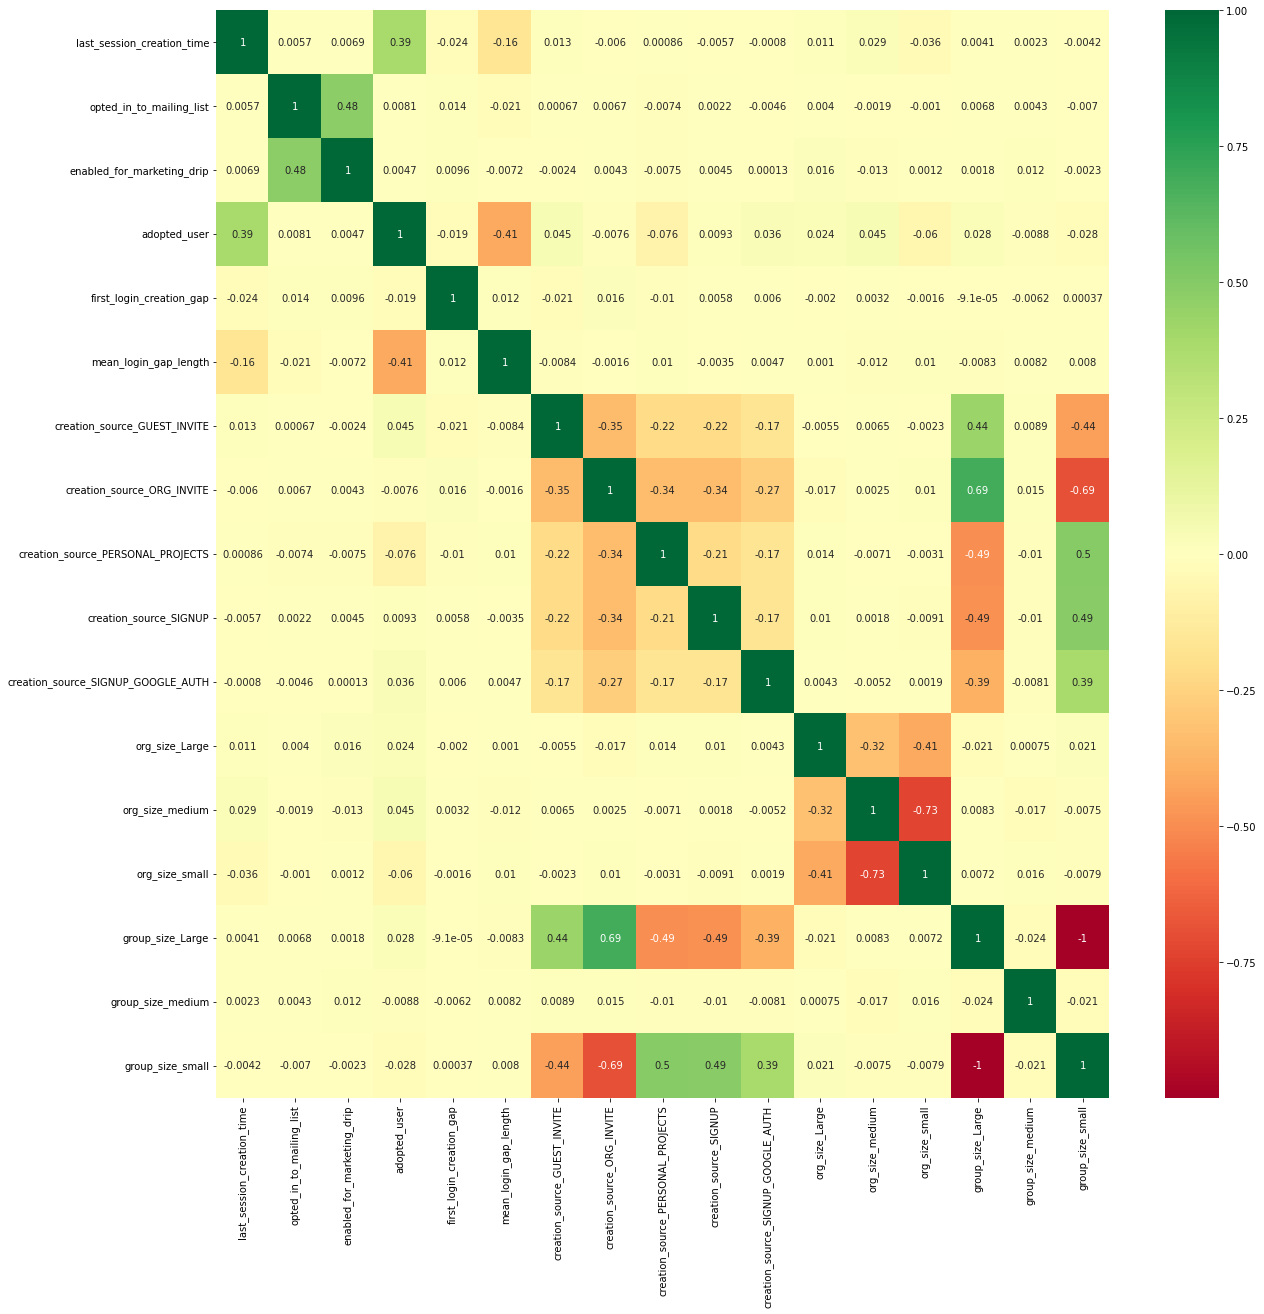

In [61]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


### Modleing I choose the random forest model because it is good for high dimensional data, also the tree based model is good for analyzing the feature importance

In [62]:
from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [63]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[3384   60]
 [  81  435]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3444
         1.0       0.88      0.84      0.86       516

    accuracy                           0.96      3960
   macro avg       0.93      0.91      0.92      3960
weighted avg       0.96      0.96      0.96      3960



=== All AUC Scores ===
[0.99182692 0.99328125 0.99105168 0.99524339 0.9929988  0.99007812
 0.99059495 0.99345853 0.98861184 0.99157994]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9918725429263272


In [66]:
feature_importance = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

mean_login_gap_length                 0.625749
last_session_creation_time            0.296577
first_login_creation_gap              0.029392
opted_in_to_mailing_list              0.007419
enabled_for_marketing_drip            0.006792
org_size_small                        0.005302
org_size_medium                       0.005283
creation_source_PERSONAL_PROJECTS     0.003717
org_size_Large                        0.003483
creation_source_SIGNUP_GOOGLE_AUTH    0.003240
creation_source_SIGNUP                0.003163
creation_source_GUEST_INVITE          0.002950
creation_source_ORG_INVITE            0.002890
group_size_small                      0.002054
group_size_Large                      0.001984
group_size_medium                     0.000003
dtype: float64


In [67]:
type(feature_importance)

pandas.core.series.Series

In [68]:
fi = pd.DataFrame(feature_importance)

In [69]:
fi.columns = ['user']
new_fi = fi.reset_index()


In [70]:
new_fi.columns=['feature','score']


In [71]:
new_fi

,feature,score
0,mean_login_gap_length,0.625749
1,last_session_creation_time,0.296577
2,first_login_creation_gap,0.029392
3,opted_in_to_mailing_list,0.007419
4,enabled_for_marketing_drip,0.006792
5,org_size_small,0.005302
6,org_size_medium,0.005283
7,creation_source_PERSONAL_PROJECTS,0.003717
8,org_size_Large,0.003483
9,creation_source_SIGNUP_GOOGLE_AUTH,0.003240


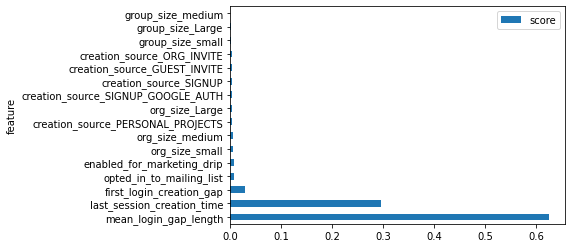

In [72]:
new_fi.plot(kind='barh',x='feature',y='score')


### In this situation, mean_login_gap_length,last_session_creation_time, first_login_creation_gap are important. That is very clear from the feature importance score. Another thing need to consider like email category, creation_source, org_size are also important factors, we need to combine the dummy variable together, although each feature in them are small, but if we combine them together, the importance score will also be very high. ( We can not sum the dummy variable into one variable, because they are highly correlated). I do not know how to explain the math theory behind this. However, it is clear: 1. mean_login_gap_length, 2.last_session_creation_time, 3. first_login_creation_gap,4.email category, 5.creation_source, 6.org_size. These features are important factors to adopted users. In my solution, there may be not accurte for one thing is about how I deal with the email address, since I moved all email domain name not in top email list like gmail, yahoo as 'other'. This may not be that good for modeling. Thanks and it is a very interesting project.